# INTRODUCTION
The project uses various Gini Criterion, Entropy Criterion and Artificial Neural Network to build models for Car Evaluation.

## IMPORTING DATASET AND LIBRARIES

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from pandas import read_csv, DataFrame
from sklearn import tree
from os import system
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/car-evaluation-data/car_evaluation1.csv")

## DATA DESCRIPTION AND DESCRIPTIVE STATISTICS

In [3]:
df.shape

(1728, 7)

In [4]:
df

,Buying Price,Maintenance Cost,No. of doors,No. of Persons,lug_boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
df.head()

,Buying Price,Maintenance Cost,No. of doors,No. of Persons,lug_boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buying Price      1728 non-null   object
 1   Maintenance Cost  1728 non-null   object
 2   No. of doors      1728 non-null   object
 3   No. of Persons    1728 non-null   object
 4   lug_boot          1728 non-null   object
 5   Safety            1728 non-null   object
 6   Decision          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

Buying Price
['vhigh' 'high' 'med' 'low'] 

Maintenance Cost
['vhigh' 'high' 'med' 'low'] 

No. of doors
['2' '3' '4' '5more'] 

No. of Persons
['2' '4' 'more'] 

lug_boot
['small' 'med' 'big'] 

Safety
['low' 'med' 'high'] 

Decision
['unacc' 'acc' 'vgood' 'good'] 



In [8]:
df.describe().T

,count,unique,top,freq
Buying Price,1728,4,vhigh,432
Maintenance Cost,1728,4,vhigh,432
No. of doors,1728,4,2,432
No. of Persons,1728,3,2,576
lug_boot,1728,3,small,576
Safety,1728,3,low,576
Decision,1728,4,unacc,1210


In [9]:
df.isnull().sum()

Buying Price        0
Maintenance Cost    0
No. of doors        0
No. of Persons      0
lug_boot            0
Safety              0
Decision            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [12]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
df["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

FEATURE ENCODING

In [14]:
orenc = OrdinalEncoder()
df_encoded = orenc.fit_transform(df)
df[df.columns] = df_encoded
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [15]:
X = df.drop(["class"], axis =1)
Y = df["class"]

## DATASET SPLITTING

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [17]:
X_train

,buying,maint,doors,persons,lug_boot,safety
589,0.0,0.0,1.0,2.0,1.0,2.0
502,0.0,3.0,2.0,1.0,0.0,2.0
1177,2.0,2.0,3.0,1.0,0.0,2.0
619,0.0,0.0,2.0,2.0,0.0,2.0
1124,2.0,2.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...
276,3.0,2.0,2.0,0.0,0.0,1.0
1322,1.0,3.0,0.0,2.0,0.0,0.0
1344,1.0,3.0,1.0,2.0,1.0,1.0
1692,1.0,1.0,2.0,2.0,2.0,1.0


## DATA VISUALIZATION

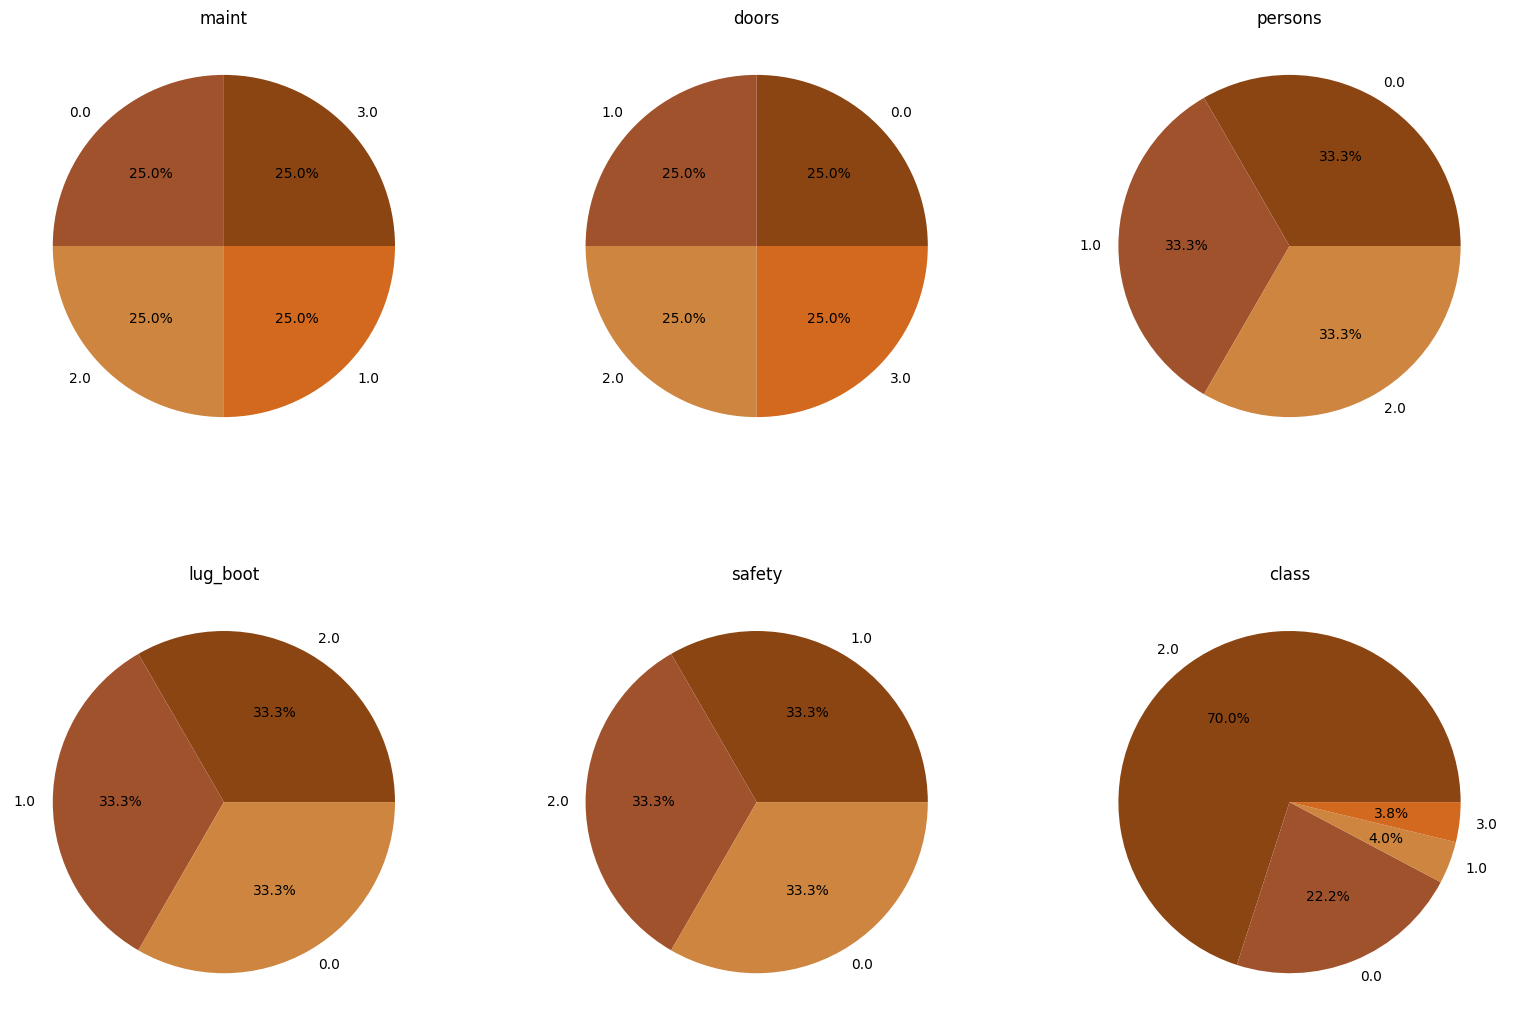

In [18]:
# Define a light color palette
colors = ['#8B4513', '#A0522D', '#CD853F', '#D2691E', '#DEB887', '#F4A460']

col = df.columns[1:]
plt.subplots(figsize=(20, 20))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length // 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.3)
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(i)

plt.show()


In [19]:
#five number summary
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
buying,1157.0,1.513397,1.118824,0.0,1.0,1.0,3.0,3.0
maint,1157.0,1.463267,1.121390,0.0,0.0,1.0,2.0,3.0
doors,1157.0,1.477960,1.121004,0.0,0.0,1.0,2.0,3.0
persons,1157.0,0.997407,0.828239,0.0,0.0,1.0,2.0,2.0
lug_boot,1157.0,0.990493,0.827143,0.0,0.0,1.0,2.0,2.0
safety,1157.0,0.992221,0.815576,0.0,0.0,1.0,2.0,2.0


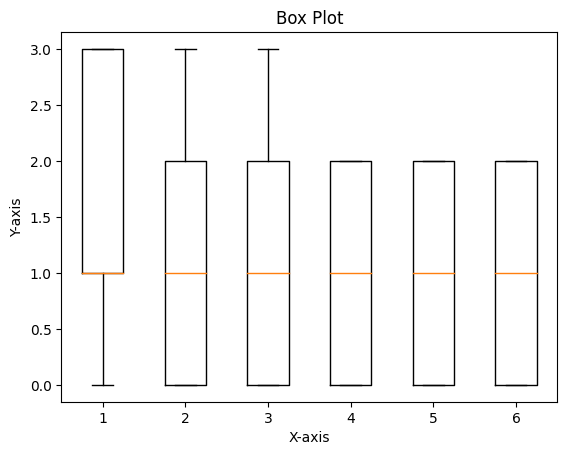

In [20]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(X_train)

# Set the title and labels
ax.set_title("Box Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Display the plot
plt.show()


## OUTLIER ANALYSIS

In [21]:
#Function to detect outliers using z-score capping
def outlier_detect(col):
    mean = np.mean(col)
    sd = np.std(col)
    upp_bd = mean + 3*sd
    low_bd = mean - 3*sd
    return upp_bd,low_bd

In [22]:
#Calculate the upper and lower bound for each feature
upp_lis = []
low_lis = []
col = X_train.columns[1:]
for i in col:
    upp,low = outlier_detect(X_train[i])
    upp_lis.append(upp)
    low_lis.append(low)
    
d = {'Upper Bound':upp_lis, 'Lower Bound': low_lis}
outlier_df = pd.DataFrame(d,index=col)
outlier_df

,Upper Bound,Lower Bound
maint,4.825984,-1.899450
doors,4.839519,-1.883599
persons,3.481049,-1.486235
lug_boot,3.470849,-1.489864
safety,3.437892,-1.453449


In [23]:
#Count the number of outliers for each feature
count_lis = []
for i in col:
    upp,low = outlier_df.loc[i]
    count = sum((X_train[i]>upp)|(X_train[i]<low))
    count_lis.append(count)
d = {'Outlier Count':count_lis}
outlier_count_df = pd.DataFrame(d, index = col)
outlier_count_df

,Outlier Count
maint,0
doors,0
persons,0
lug_boot,0
safety,0


DATA SCALING

In [24]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train)
X_test_scl = sc.transform(X_test)

## BUILDING THE MODEL USING THE GINI CRITERION


In [25]:
clas_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state=0)
clas_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [26]:
y_pred_gini = clas_gini.predict(X_test)

In [27]:
y_pred = clas_gini.predict(X_test_scl)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 32,   0, 107,   0],
       [  3,   0,  21,   0],
       [ 70,   0, 313,   0],
       [ 10,   0,  15,   0]])

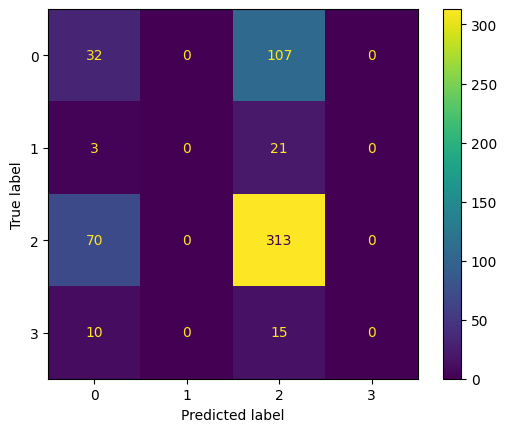

In [28]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

In [29]:
#Checking the accuracy of gini model
print(f"Model accuracy score with criterion gini index: {round((accuracy_score(y_test, y_pred_gini) * 100), 2)}%")

Model accuracy score with criterion gini index: 82.31%


[Text(0.4583333333333333, 0.9, 'x[3] <= 0.5\ngini = 0.442\nsamples = 1157\nvalue = [245, 45, 827, 40]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 398\nvalue = [0, 0, 398, 0]'),
 Text(0.5416666666666666, 0.7, 'x[5] <= 0.5\ngini = 0.57\nsamples = 759\nvalue = [245, 45, 429, 40]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 2.5\ngini = 0.642\nsamples = 253\nvalue = [131, 21, 61, 40]'),
 Text(0.16666666666666666, 0.3, 'x[0] <= 0.5\ngini = 0.631\nsamples = 185\nvalue = [100, 21, 24, 40]'),
 Text(0.08333333333333333, 0.1, 'gini = 0.4\nsamples = 65\nvalue = [47, 0, 18, 0]'),
 Text(0.25, 0.1, 'gini = 0.661\nsamples = 120\nvalue = [53, 21, 6, 40]'),
 Text(0.5, 0.3, 'x[1] <= 0.5\ngini = 0.496\nsamples = 68\nvalue = [31, 0, 37, 0]'),
 Text(0.4166666666666667, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 19, 0]'),
 Text(0.5833333333333334, 0.1, 'gini = 0.465\nsamples = 49\nvalue = [31, 0, 18, 0]'),
 Text(0.75, 0.5, 'x[5] <= 1.5\ngini = 0.418\nsamples = 506\nvalue = [114, 24, 368, 0]'),
 Text(0.6666

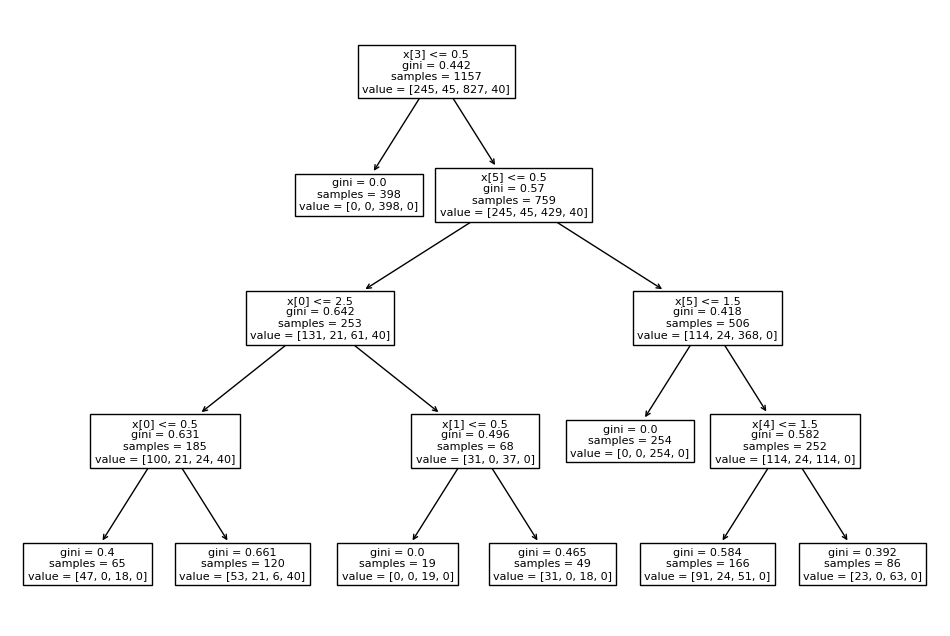

In [30]:
#Plotting the gini decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clas_gini.fit(X_train, y_train))

## BUILDING THE MODEL USING THE ENTROPY CRITERION

In [31]:
Decision_tree_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state=0)
Decision_tree_entropy.fit(X_train_scl, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [32]:
y_test_prediction_entropy = Decision_tree_entropy.predict(X_test_scl)

In [33]:
print(f"Accuracy of model using the entropy criterian is {round(accuracy_score( y_test, y_test_prediction_entropy) * 100, 2)}%")

Accuracy of model using the entropy criterian is 82.31%


In [34]:
#Checking the overfitting and underfitting
print(f"Accuracy of training set is {round((Decision_tree_entropy.score(X_train_scl, y_train) * 100), 2)}%")
print(f"Accuracy of test set is {round(Decision_tree_entropy.score(X_test_scl, y_test) * 100, 2)}%")
# There's no overfitting in dataset

Accuracy of training set is 82.63%
Accuracy of test set is 82.31%


In [35]:
cm = confusion_matrix(y_test, y_test_prediction_entropy)
print(f"Confusion matrix for entropy model \n{cm}")

Confusion matrix for entropy model 
[[127   0  12   0]
 [ 24   0   0   0]
 [ 40   0 343   0]
 [ 25   0   0   0]]


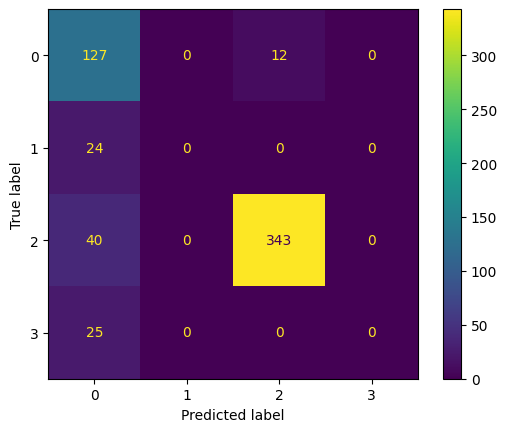

In [36]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot();

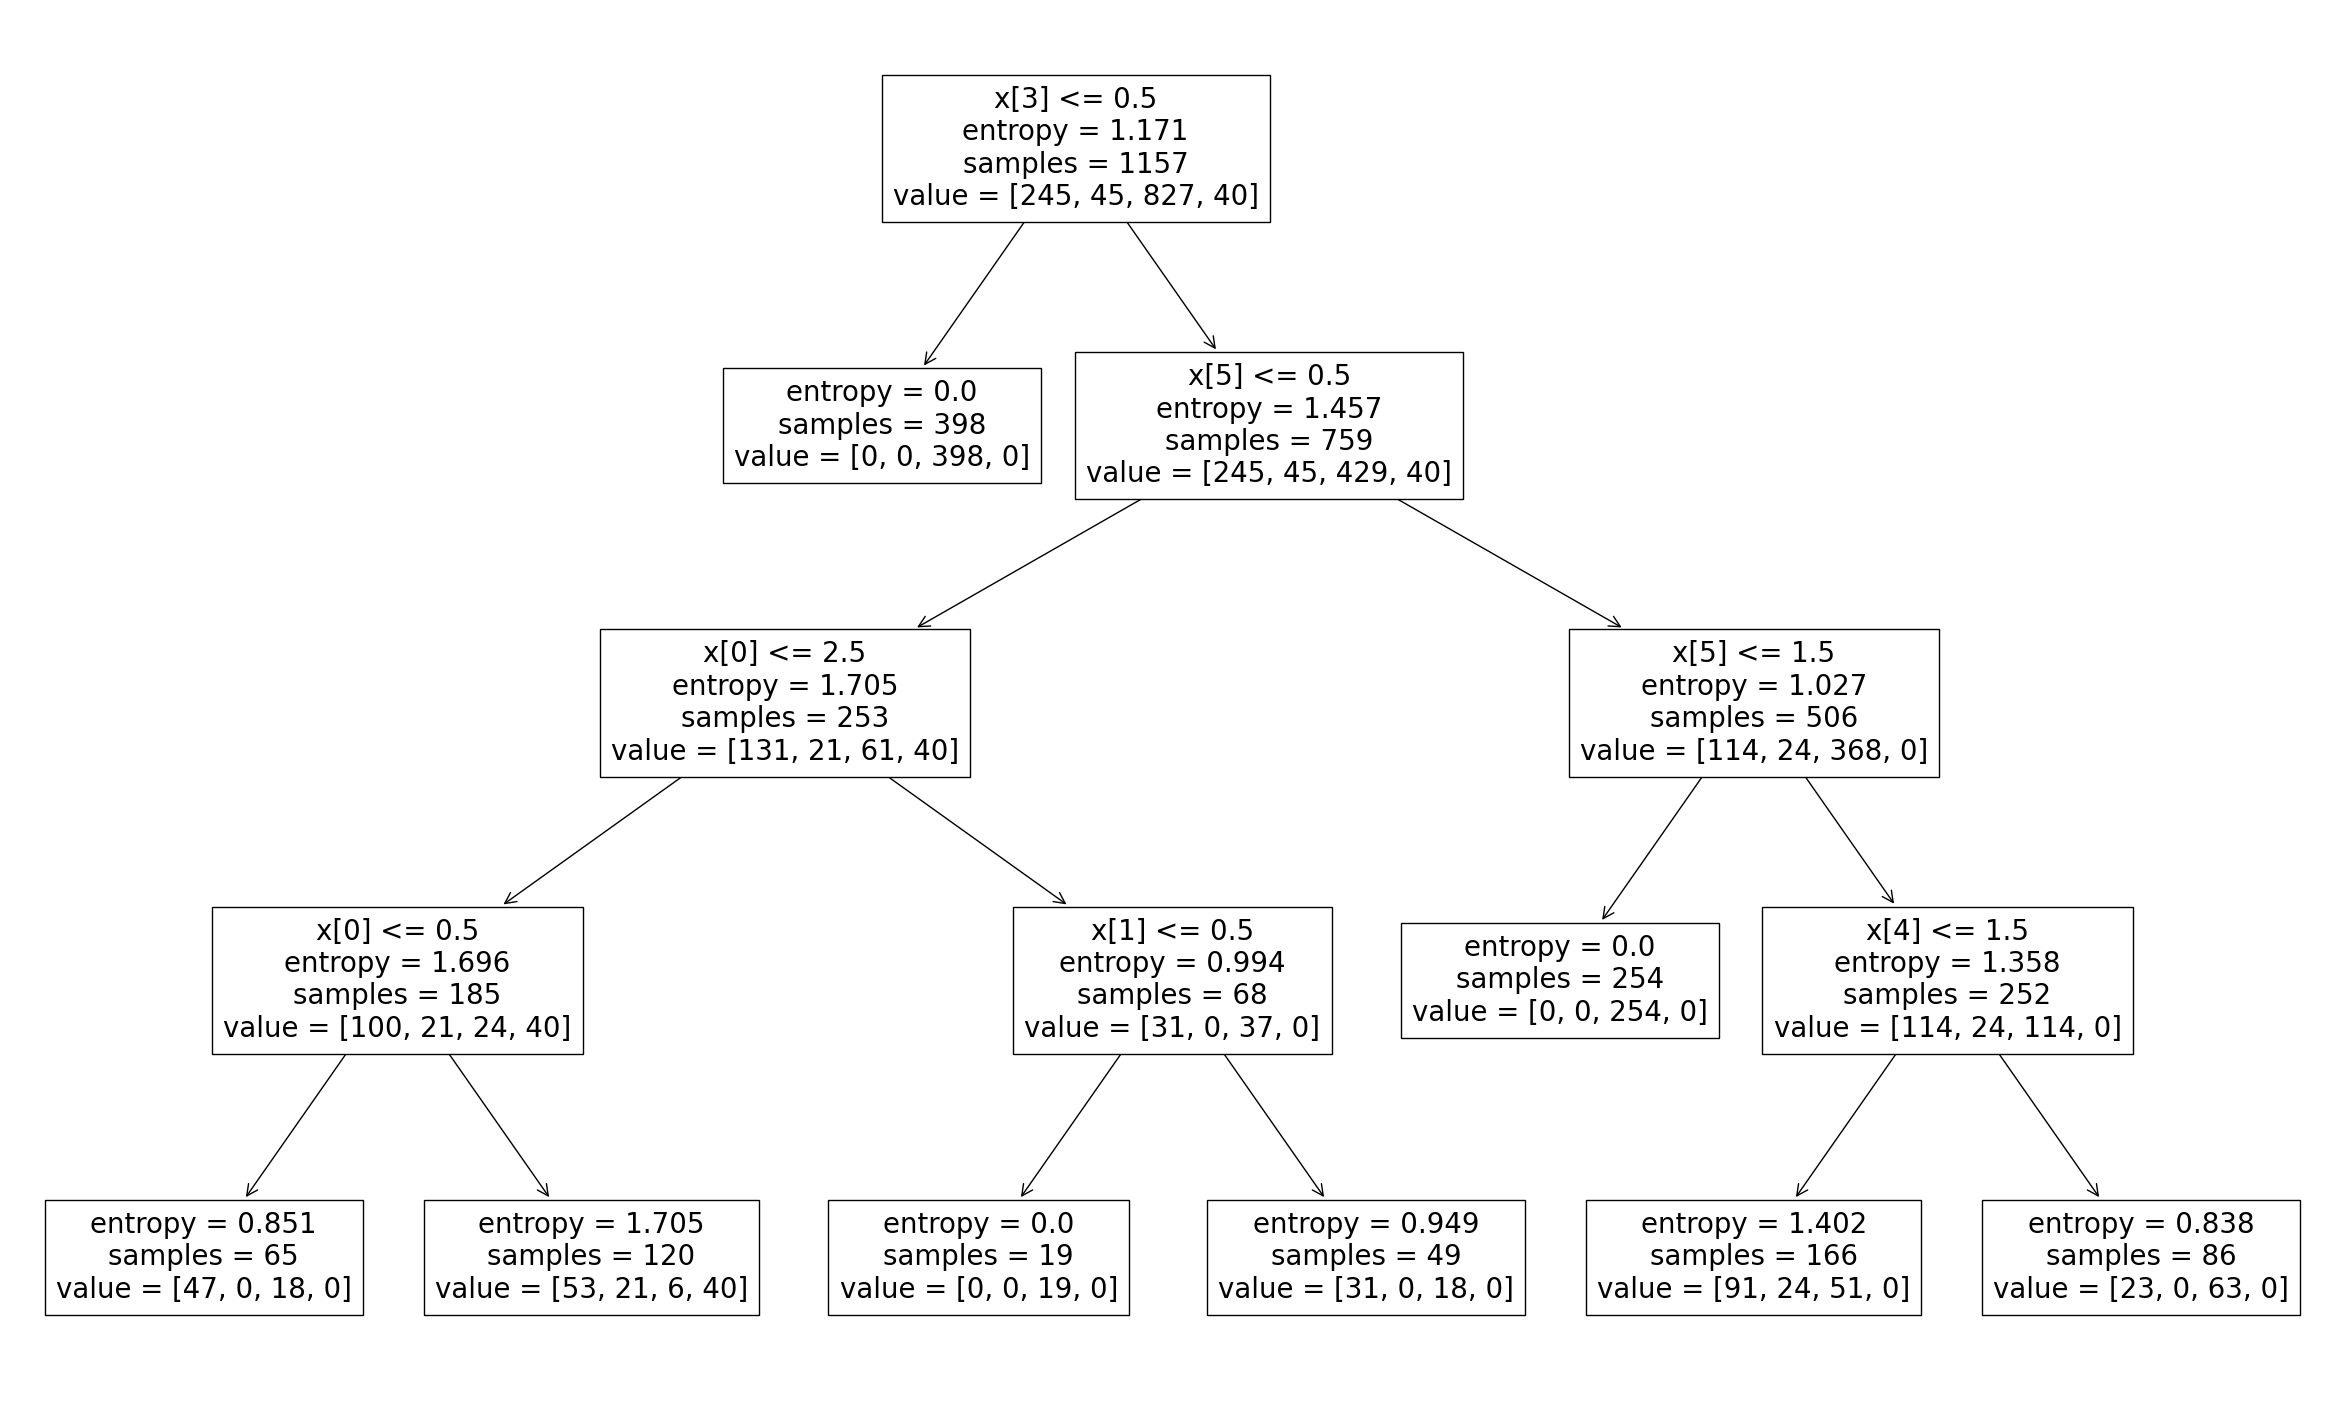

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt

# Define and initialize the classifier with max_depth=3
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Fit the classifier to the training data
clf_entropy.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(30, 18))
tree.plot_tree(clf_entropy)
plt.show()


## BUILDING THE MODEL BY USING THE ANN (Artificial Neural Networks)

In [38]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_shape=(6,), activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model)

param_grid = {
'batch_size': [10, 20, 30],
'epochs': [10, 20, 30],
'optimizer': [Adam(), SGD()],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scl, y_train)

Epoch 1/10
78/78 [==============================] - 1s 2ms/step - loss: 0.1283 - accuracy: 0.0661
Epoch 2/10
78/78 [==============================] - 0s 2ms/step - loss: -0.9839 - accuracy: 0.0428
Epoch 3/10
78/78 [==============================] - 0s 2ms/step - loss: -2.4671 - accuracy: 0.0428
Epoch 4/10
78/78 [==============================] - 0s 2ms/step - loss: -4.7550 - accuracy: 0.0428
Epoch 5/10
78/78 [==============================] - 0s 2ms/step - loss: -8.3780 - accuracy: 0.0428
Epoch 6/10
78/78 [==============================] - 0s 2ms/step - loss: -13.8526 - accuracy: 0.0428
Epoch 7/10
78/78 [==============================] - 0s 2ms/step - loss: -22.0978 - accuracy: 0.0428
Epoch 8/10
78/78 [==============================] - 0s 2ms/step - loss: -34.0835 - accuracy: 0.0428
Epoch 9/10
78/78 [==============================] - 0s 2ms/step - loss: -50.2347 - accuracy: 0.0428
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: -85.1360 - accuracy: 0.0311
Epoch

In [39]:
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'batch_size': 10, 'epochs': 10, 'optimizer': <keras.optimizers.legacy.gradient_descent.SGD object at 0x7e018aa8aec0>}
Best Accuracy:  0.21174214283625284


In [40]:
model = Sequential()
model.add(Dense(12, input_shape=(6,), activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="sgd", metrics=['accuracy'])
model.fit(X_train_scl,y_train,epochs=10, batch_size=10)

Epoch 1/10
116/116 [==============================] - 1s 2ms/step - loss: -0.7621 - accuracy: 0.0614
Epoch 2/10
116/116 [==============================] - 0s 2ms/step - loss: -1796.0739 - accuracy: 0.0389
Epoch 3/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2057
Epoch 4/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118
Epoch 5/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118
Epoch 6/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118
Epoch 7/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118
Epoch 8/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118
Epoch 9/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118
Epoch 10/10
116/116 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.2118


In [41]:
accuracy = model.evaluate(X_train, y_train)

37/37 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.2118


In [42]:
print(f' The accuracy of the model is '+ str(round(accuracy[len(accuracy)-1]*100,2))+'%')

 The accuracy of the model is 21.18%


## BUILDING THE MODEL USING RANDOM FOREST

In [43]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)
print("model accuracy(10 estimator) : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

model accuracy(10 estimator) : 0.9440


In [44]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0) 
rfc_100.fit(X_train,y_train)
y_pred_100= rfc_100.predict(X_test)
print("model accuracy(100 estimator) : {0:0.4f}".format(accuracy_score(y_test, y_pred_100)))

model accuracy(100 estimator) : 0.9650


# CONCLUSION:

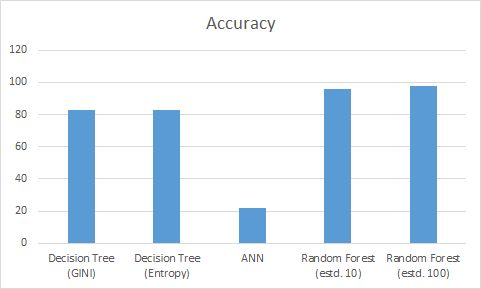

On calculating the accuracy score for the 3 different models with parameter variations, we can conclude that Random Forest perform the best. Of the two different paramter we used, Random Forest with estimator 100 gives more accuracy from the Random Forest with estimator 10. A visual representation of calculated accuracy scores of all the models has been plotted above using bar graph.